In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetes_data.csv',index_col=0,parse_dates=True)

In [3]:
#we will analyse the patient 1 for the reference
patient='Patient 5'

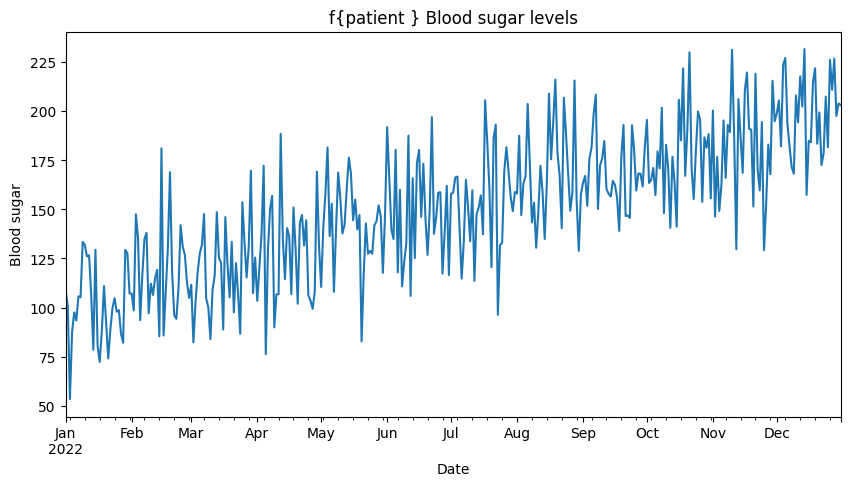

In [4]:
#Now we will plot the blood sugar levels of the patient using matplotlib
data[patient].plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Blood sugar')
plt.title('f{patient } Blood sugar levels')
plt.show()

In [5]:
#now we will import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [7]:
model=ARIMA(data[patient],order=(3,3,3))
model_fit=model.fit()

c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dixit\AppData\Local\Pr

In [8]:
print(model_fit.summary)

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x000001EB1D9DB160>>


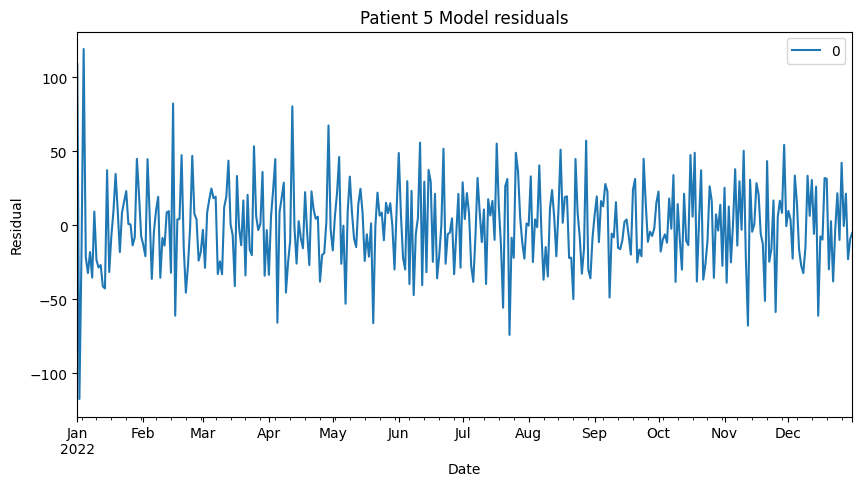

In [9]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title(f'{patient} Model residuals')
plt.show()

In [11]:
# forecast=model_fit.forecast(steps=305)
# forecast=pd.Series(forecast[0],index=pd.date_range(start='1/1/2023',end='12/31/2023',freq='D'))
# forecast.plot(figsize=(12,6))
# plt.xlabel('Date')
# plt.ylabel('Sugar levels')
# plt.title(f'{patient} Blood sugar in 2023')

c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Patient 5 Blood sugar in 2023')

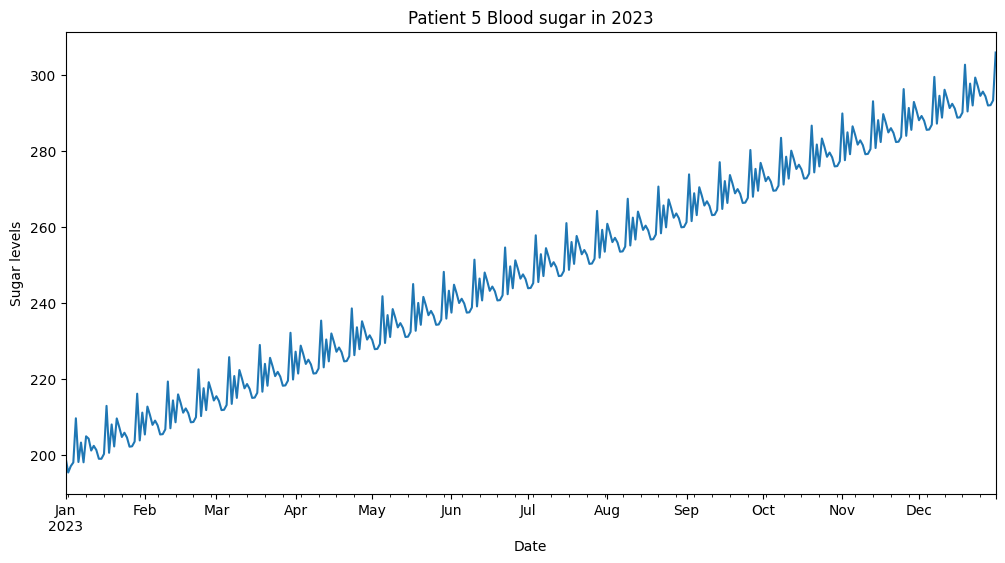

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model with seasonal order (1, 1, 1, 12)
model = SARIMAX(data[patient], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for 2023
forecast = model_fit.forecast(steps=365)

# Plot the predictions
forecast = pd.Series(forecast, index=pd.date_range(start='1/1/2023', end='12/31/2023', freq='D'))
forecast.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Sugar levels')
plt.title(f'{patient} Blood sugar in 2023')


c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dixit\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


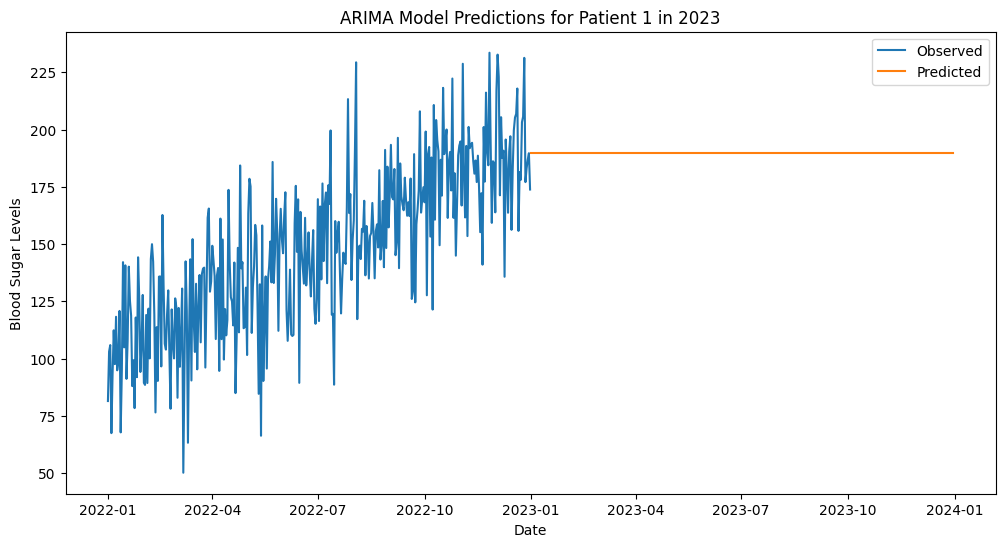

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load patient's blood sugar data from CSV file
data = pd.read_csv('diabetes_data.csv', index_col=0, parse_dates=True)

# Specify the patient to model
patient = 'Patient 1'

# Fit an ARIMA model to the patient's blood sugar data
model = ARIMA(data[patient], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions for the next 365 days
forecast = model_fit.forecast(steps=365)

# Create a new time series with the predicted values
forecast_ts = pd.Series(forecast[0], index=pd.date_range(start='1/1/2023', end='12/31/2023', freq='D'))

# Plot the predicted blood sugar levels for the patient
plt.figure(figsize=(12, 6))
plt.plot(data[patient], label='Observed')
plt.plot(forecast_ts, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Blood Sugar Levels')
plt.title(f'ARIMA Model Predictions for {patient} in 2023')
plt.legend()
plt.show()


In [ ]:
df=pd.read_csv("diabetes_data.csv")

In [ ]:
df.head()

,Patient 1,Patient 2,Patient 3,Patient 4,Patient 5,Patient 6,Patient 7,Patient 8,Patient 9,Patient 10,...,Patient 91,Patient 92,Patient 93,Patient 94,Patient 95,Patient 96,Patient 97,Patient 98,Patient 99,Patient 100
2022-01-01,81.439207,114.947204,92.529894,61.361584,108.914618,125.547142,118.670936,83.165572,100.683140,101.837810,...,81.846231,103.849407,81.716637,109.368446,109.592603,81.847330,85.227119,75.020297,121.904261,70.720398
2022-01-02,103.010504,138.711434,85.068879,111.621112,100.563707,89.827333,99.048272,103.937469,111.339570,141.814856,...,61.425478,129.493642,143.165481,96.923726,85.777495,82.611199,86.248000,143.358345,125.920564,102.766801
2022-01-03,105.864179,108.319535,146.656995,102.075565,53.426988,49.238471,118.617945,128.375260,126.584026,104.501132,...,85.859498,106.425521,120.252429,125.716893,100.041188,113.272137,122.995312,75.228602,69.087131,109.524223
2022-01-04,67.422420,116.723227,106.268899,98.571483,87.138795,93.445382,102.083174,66.614599,58.985964,156.280439,...,116.776316,106.254305,92.181560,112.920028,91.424104,135.913863,107.166312,78.126482,65.231451,85.107660
2022-01-05,93.047519,100.780392,93.758356,113.880470,97.552668,103.835306,116.603189,86.387986,84.524937,86.019544,...,49.012322,120.911303,97.852191,120.543260,144.673535,85.012079,34.142717,127.803574,40.708673,121.465141
